## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              95.70
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   1.13e-112
Time:                        15:43:33   Log-Likelihood:                         -296.70
No. Observations:                 404   AIC:                                      619.4
Df Residuals:                     391   BIC:                                      671.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

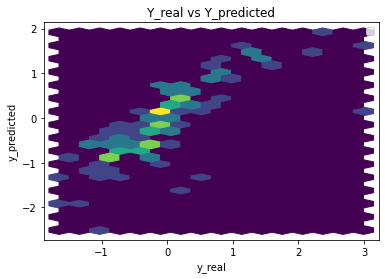

Performance Metrics
Mean Squared Error: 0.30367230148670893
Mean Absolute Error: 0.3673147635124063
Manhattan distance: 37.466105878265424
Euclidean distance: 5.565480639769066


Stats Model MAE 0.3673147635124063


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.03548
0:	learn: 1.0082108	total: 58.8ms	remaining: 58.7s
1:	learn: 0.9872299	total: 61.5ms	remaining: 30.7s
2:	learn: 0.9645389	total: 63.2ms	remaining: 21s
3:	learn: 0.9454118	total: 64.7ms	remaining: 16.1s
4:	learn: 0.9265798	total: 66.4ms	remaining: 13.2s
5:	learn: 0.9092554	total: 68.1ms	remaining: 11.3s
6:	learn: 0.8898659	total: 69.8ms	remaining: 9.9s
7:	learn: 0.8726119	total: 72.7ms	remaining: 9.02s
8:	learn: 0.8552973	total: 76.1ms	remaining: 8.37s
9:	learn: 0.8371944	total: 79.3ms	remaining: 7.85s
10:	learn: 0.8193237	total: 82.2ms	remaining: 7.39s
11:	learn: 0.8031493	total: 83.9ms	remaining: 6.91s
12:	learn: 0.7867993	total: 86.3ms	remaining: 6.55s
13:	learn: 0.7708202	total: 89.8ms	remaining: 6.32s
14:	learn: 0.7571418	total: 92.4ms	remaining: 6.07s
15:	learn: 0.7420519	total: 95.2ms	remaining: 5.85s
16:	learn: 0.7299846	total: 98ms	remaining: 5.67s
17:	learn: 0.7163965	total: 102ms	remaining: 5.54s
18:	learn: 0.7028034	total: 104ms	remaining: 5.36s


29:	learn: 0.5830679	total: 123ms	remaining: 3.98s
30:	learn: 0.5735899	total: 125ms	remaining: 3.92s
31:	learn: 0.5646447	total: 129ms	remaining: 3.89s
32:	learn: 0.5573531	total: 131ms	remaining: 3.83s
33:	learn: 0.5499337	total: 133ms	remaining: 3.79s
34:	learn: 0.5419410	total: 137ms	remaining: 3.77s


35:	learn: 0.5339571	total: 140ms	remaining: 3.76s
36:	learn: 0.5263838	total: 145ms	remaining: 3.77s
37:	learn: 0.5188980	total: 146ms	remaining: 3.7s
38:	learn: 0.5115447	total: 149ms	remaining: 3.67s
39:	learn: 0.5034084	total: 151ms	remaining: 3.63s
40:	learn: 0.4977179	total: 153ms	remaining: 3.58s
41:	learn: 0.4905909	total: 155ms	remaining: 3.53s
42:	learn: 0.4848951	total: 156ms	remaining: 3.47s
43:	learn: 0.4778754	total: 158ms	remaining: 3.42s
44:	learn: 0.4725380	total: 159ms	remaining: 3.37s
45:	learn: 0.4667597	total: 160ms	remaining: 3.32s
46:	learn: 0.4619064	total: 163ms	remaining: 3.3s
47:	learn: 0.4559933	total: 166ms	remaining: 3.28s
48:	learn: 0.4512872	total: 171ms	remaining: 3.31s


49:	learn: 0.4465810	total: 177ms	remaining: 3.36s
50:	learn: 0.4412677	total: 179ms	remaining: 3.34s
51:	learn: 0.4368043	total: 182ms	remaining: 3.32s
52:	learn: 0.4315949	total: 186ms	remaining: 3.31s
53:	learn: 0.4284034	total: 187ms	remaining: 3.27s
54:	learn: 0.4240378	total: 188ms	remaining: 3.23s
55:	learn: 0.4203464	total: 190ms	remaining: 3.2s
56:	learn: 0.4157814	total: 191ms	remaining: 3.17s
57:	learn: 0.4110330	total: 193ms	remaining: 3.13s
58:	learn: 0.4077474	total: 194ms	remaining: 3.1s
59:	learn: 0.4037356	total: 195ms	remaining: 3.06s
60:	learn: 0.3997939	total: 198ms	remaining: 3.04s
61:	learn: 0.3954724	total: 199ms	remaining: 3.02s
62:	learn: 0.3921783	total: 201ms	remaining: 2.98s
63:	learn: 0.3882040	total: 202ms	remaining: 2.95s
64:	learn: 0.3850953	total: 204ms	remaining: 2.94s
65:	learn: 0.3812396	total: 206ms	remaining: 2.91s
66:	learn: 0.3778013	total: 207ms	remaining: 2.88s
67:	learn: 0.3748601	total: 209ms	remaining: 2.87s
68:	learn: 0.3712375	total: 212ms

109:	learn: 0.2880025	total: 298ms	remaining: 2.41s
110:	learn: 0.2866667	total: 300ms	remaining: 2.4s
111:	learn: 0.2854472	total: 303ms	remaining: 2.4s
112:	learn: 0.2845727	total: 304ms	remaining: 2.39s
113:	learn: 0.2835930	total: 306ms	remaining: 2.37s
114:	learn: 0.2825090	total: 308ms	remaining: 2.37s
115:	learn: 0.2806930	total: 311ms	remaining: 2.37s
116:	learn: 0.2793687	total: 312ms	remaining: 2.36s
117:	learn: 0.2778669	total: 314ms	remaining: 2.35s
118:	learn: 0.2772352	total: 315ms	remaining: 2.33s


119:	learn: 0.2758827	total: 319ms	remaining: 2.33s
120:	learn: 0.2748570	total: 320ms	remaining: 2.32s
121:	learn: 0.2737633	total: 321ms	remaining: 2.31s
122:	learn: 0.2725290	total: 323ms	remaining: 2.3s
123:	learn: 0.2717704	total: 324ms	remaining: 2.29s
124:	learn: 0.2708665	total: 326ms	remaining: 2.28s
125:	learn: 0.2697746	total: 327ms	remaining: 2.27s
126:	learn: 0.2688839	total: 328ms	remaining: 2.26s
127:	learn: 0.2675615	total: 330ms	remaining: 2.25s
128:	learn: 0.2662823	total: 332ms	remaining: 2.24s
129:	learn: 0.2655835	total: 333ms	remaining: 2.23s
130:	learn: 0.2649836	total: 335ms	remaining: 2.22s
131:	learn: 0.2641663	total: 336ms	remaining: 2.21s
132:	learn: 0.2632171	total: 337ms	remaining: 2.2s
133:	learn: 0.2625468	total: 339ms	remaining: 2.19s
134:	learn: 0.2618899	total: 340ms	remaining: 2.18s
135:	learn: 0.2608483	total: 342ms	remaining: 2.17s
136:	learn: 0.2602160	total: 343ms	remaining: 2.16s
137:	learn: 0.2595316	total: 344ms	remaining: 2.15s
138:	learn: 0.

143:	learn: 0.2543612	total: 355ms	remaining: 2.11s
144:	learn: 0.2535731	total: 357ms	remaining: 2.1s
145:	learn: 0.2526243	total: 358ms	remaining: 2.09s
146:	learn: 0.2520259	total: 359ms	remaining: 2.08s
147:	learn: 0.2508727	total: 362ms	remaining: 2.08s
148:	learn: 0.2505039	total: 363ms	remaining: 2.07s
149:	learn: 0.2495777	total: 364ms	remaining: 2.06s
150:	learn: 0.2490897	total: 366ms	remaining: 2.06s
151:	learn: 0.2483751	total: 368ms	remaining: 2.05s
152:	learn: 0.2475505	total: 369ms	remaining: 2.04s
153:	learn: 0.2469080	total: 371ms	remaining: 2.04s
154:	learn: 0.2461591	total: 374ms	remaining: 2.04s
155:	learn: 0.2457116	total: 376ms	remaining: 2.04s
156:	learn: 0.2448771	total: 379ms	remaining: 2.04s
157:	learn: 0.2442401	total: 383ms	remaining: 2.04s
158:	learn: 0.2433494	total: 386ms	remaining: 2.04s
159:	learn: 0.2424774	total: 389ms	remaining: 2.04s
160:	learn: 0.2422330	total: 391ms	remaining: 2.04s
161:	learn: 0.2418644	total: 394ms	remaining: 2.04s
162:	learn: 0

180:	learn: 0.2323963	total: 465ms	remaining: 2.1s
181:	learn: 0.2317574	total: 468ms	remaining: 2.1s
182:	learn: 0.2312021	total: 471ms	remaining: 2.1s
183:	learn: 0.2305323	total: 472ms	remaining: 2.1s
184:	learn: 0.2297827	total: 475ms	remaining: 2.09s
185:	learn: 0.2291961	total: 476ms	remaining: 2.08s
186:	learn: 0.2286201	total: 479ms	remaining: 2.08s


187:	learn: 0.2283700	total: 502ms	remaining: 2.17s
188:	learn: 0.2279917	total: 504ms	remaining: 2.16s
189:	learn: 0.2273837	total: 507ms	remaining: 2.16s
190:	learn: 0.2267076	total: 509ms	remaining: 2.16s
191:	learn: 0.2261313	total: 513ms	remaining: 2.16s
192:	learn: 0.2253535	total: 515ms	remaining: 2.15s
193:	learn: 0.2248472	total: 517ms	remaining: 2.15s


194:	learn: 0.2240142	total: 521ms	remaining: 2.15s
195:	learn: 0.2237477	total: 524ms	remaining: 2.15s
196:	learn: 0.2229954	total: 527ms	remaining: 2.15s
197:	learn: 0.2226228	total: 529ms	remaining: 2.14s
198:	learn: 0.2219163	total: 534ms	remaining: 2.15s
199:	learn: 0.2214413	total: 537ms	remaining: 2.15s
200:	learn: 0.2208274	total: 541ms	remaining: 2.15s
201:	learn: 0.2202458	total: 545ms	remaining: 2.15s
202:	learn: 0.2195627	total: 548ms	remaining: 2.15s
203:	learn: 0.2189928	total: 551ms	remaining: 2.15s
204:	learn: 0.2180908	total: 554ms	remaining: 2.15s
205:	learn: 0.2177821	total: 559ms	remaining: 2.15s
206:	learn: 0.2172244	total: 561ms	remaining: 2.15s
207:	learn: 0.2167215	total: 565ms	remaining: 2.15s
208:	learn: 0.2161299	total: 568ms	remaining: 2.15s
209:	learn: 0.2156990	total: 571ms	remaining: 2.15s
210:	learn: 0.2153646	total: 573ms	remaining: 2.14s
211:	learn: 0.2149762	total: 575ms	remaining: 2.14s
212:	learn: 0.2143365	total: 577ms	remaining: 2.13s
213:	learn: 

249:	learn: 0.1967708	total: 645ms	remaining: 1.93s
250:	learn: 0.1962508	total: 647ms	remaining: 1.93s
251:	learn: 0.1957852	total: 648ms	remaining: 1.92s
252:	learn: 0.1952149	total: 650ms	remaining: 1.92s
253:	learn: 0.1944225	total: 651ms	remaining: 1.91s
254:	learn: 0.1941373	total: 652ms	remaining: 1.91s
255:	learn: 0.1937682	total: 654ms	remaining: 1.9s
256:	learn: 0.1934925	total: 655ms	remaining: 1.89s
257:	learn: 0.1931459	total: 656ms	remaining: 1.89s
258:	learn: 0.1926908	total: 657ms	remaining: 1.88s
259:	learn: 0.1924459	total: 659ms	remaining: 1.88s
260:	learn: 0.1922488	total: 660ms	remaining: 1.87s
261:	learn: 0.1918219	total: 661ms	remaining: 1.86s
262:	learn: 0.1912583	total: 664ms	remaining: 1.86s
263:	learn: 0.1908715	total: 666ms	remaining: 1.86s
264:	learn: 0.1902932	total: 667ms	remaining: 1.85s
265:	learn: 0.1896775	total: 669ms	remaining: 1.84s
266:	learn: 0.1888895	total: 670ms	remaining: 1.84s
267:	learn: 0.1885667	total: 671ms	remaining: 1.83s
268:	learn: 0

271:	learn: 0.1869991	total: 677ms	remaining: 1.81s
272:	learn: 0.1865849	total: 679ms	remaining: 1.81s
273:	learn: 0.1860412	total: 681ms	remaining: 1.8s
274:	learn: 0.1855995	total: 682ms	remaining: 1.8s
275:	learn: 0.1849153	total: 684ms	remaining: 1.79s
276:	learn: 0.1844753	total: 685ms	remaining: 1.79s
277:	learn: 0.1842215	total: 687ms	remaining: 1.78s
278:	learn: 0.1838352	total: 688ms	remaining: 1.78s
279:	learn: 0.1832344	total: 690ms	remaining: 1.77s
280:	learn: 0.1828145	total: 698ms	remaining: 1.79s


281:	learn: 0.1824384	total: 701ms	remaining: 1.78s
282:	learn: 0.1821486	total: 703ms	remaining: 1.78s
283:	learn: 0.1819941	total: 704ms	remaining: 1.77s
284:	learn: 0.1817543	total: 706ms	remaining: 1.77s
285:	learn: 0.1814084	total: 708ms	remaining: 1.77s
286:	learn: 0.1808009	total: 711ms	remaining: 1.76s
287:	learn: 0.1803452	total: 713ms	remaining: 1.76s
288:	learn: 0.1801005	total: 716ms	remaining: 1.76s
289:	learn: 0.1794366	total: 718ms	remaining: 1.76s
290:	learn: 0.1788596	total: 719ms	remaining: 1.75s
291:	learn: 0.1779897	total: 720ms	remaining: 1.75s
292:	learn: 0.1772661	total: 722ms	remaining: 1.74s
293:	learn: 0.1767277	total: 723ms	remaining: 1.74s
294:	learn: 0.1761792	total: 725ms	remaining: 1.73s
295:	learn: 0.1756152	total: 726ms	remaining: 1.73s
296:	learn: 0.1755048	total: 727ms	remaining: 1.72s
297:	learn: 0.1750830	total: 729ms	remaining: 1.72s
298:	learn: 0.1745683	total: 730ms	remaining: 1.71s
299:	learn: 0.1739607	total: 732ms	remaining: 1.71s
300:	learn: 

332:	learn: 0.1600961	total: 806ms	remaining: 1.61s
333:	learn: 0.1596337	total: 810ms	remaining: 1.61s
334:	learn: 0.1593432	total: 821ms	remaining: 1.63s
335:	learn: 0.1589572	total: 824ms	remaining: 1.63s
336:	learn: 0.1586706	total: 827ms	remaining: 1.63s


337:	learn: 0.1582634	total: 841ms	remaining: 1.65s
338:	learn: 0.1580654	total: 845ms	remaining: 1.65s
339:	learn: 0.1578583	total: 850ms	remaining: 1.65s


340:	learn: 0.1574808	total: 853ms	remaining: 1.65s
341:	learn: 0.1571136	total: 868ms	remaining: 1.67s
342:	learn: 0.1568061	total: 874ms	remaining: 1.67s
343:	learn: 0.1563945	total: 878ms	remaining: 1.67s
344:	learn: 0.1560304	total: 893ms	remaining: 1.7s
345:	learn: 0.1556422	total: 898ms	remaining: 1.7s
346:	learn: 0.1553220	total: 902ms	remaining: 1.7s
347:	learn: 0.1549210	total: 908ms	remaining: 1.7s
348:	learn: 0.1544770	total: 958ms	remaining: 1.79s


349:	learn: 0.1541945	total: 974ms	remaining: 1.81s
350:	learn: 0.1539154	total: 979ms	remaining: 1.81s
351:	learn: 0.1532856	total: 984ms	remaining: 1.81s
352:	learn: 0.1527184	total: 994ms	remaining: 1.82s


353:	learn: 0.1522401	total: 1.04s	remaining: 1.91s
354:	learn: 0.1516062	total: 1.05s	remaining: 1.91s
355:	learn: 0.1513559	total: 1.06s	remaining: 1.91s
356:	learn: 0.1510329	total: 1.06s	remaining: 1.91s
357:	learn: 0.1504762	total: 1.06s	remaining: 1.91s
358:	learn: 0.1501889	total: 1.07s	remaining: 1.91s
359:	learn: 0.1498665	total: 1.07s	remaining: 1.9s
360:	learn: 0.1494302	total: 1.07s	remaining: 1.9s
361:	learn: 0.1491391	total: 1.08s	remaining: 1.91s
362:	learn: 0.1488081	total: 1.08s	remaining: 1.9s
363:	learn: 0.1483358	total: 1.09s	remaining: 1.9s
364:	learn: 0.1479818	total: 1.09s	remaining: 1.9s
365:	learn: 0.1475711	total: 1.1s	remaining: 1.9s
366:	learn: 0.1472568	total: 1.1s	remaining: 1.9s
367:	learn: 0.1467535	total: 1.11s	remaining: 1.9s
368:	learn: 0.1464008	total: 1.11s	remaining: 1.9s
369:	learn: 0.1462175	total: 1.11s	remaining: 1.9s
370:	learn: 0.1457902	total: 1.12s	remaining: 1.89s
371:	learn: 0.1453962	total: 1.12s	remaining: 1.89s


372:	learn: 0.1450213	total: 1.17s	remaining: 1.96s
373:	learn: 0.1445210	total: 1.17s	remaining: 1.96s
374:	learn: 0.1441650	total: 1.17s	remaining: 1.95s
375:	learn: 0.1436988	total: 1.18s	remaining: 1.95s
376:	learn: 0.1432052	total: 1.18s	remaining: 1.95s
377:	learn: 0.1428206	total: 1.18s	remaining: 1.95s
378:	learn: 0.1425338	total: 1.18s	remaining: 1.94s
379:	learn: 0.1421965	total: 1.19s	remaining: 1.94s
380:	learn: 0.1420749	total: 1.19s	remaining: 1.94s
381:	learn: 0.1417582	total: 1.2s	remaining: 1.93s
382:	learn: 0.1414479	total: 1.2s	remaining: 1.93s


383:	learn: 0.1410188	total: 1.2s	remaining: 1.93s
384:	learn: 0.1407593	total: 1.21s	remaining: 1.93s
385:	learn: 0.1402649	total: 1.21s	remaining: 1.93s
386:	learn: 0.1397210	total: 1.23s	remaining: 1.94s
387:	learn: 0.1394218	total: 1.23s	remaining: 1.94s
388:	learn: 0.1391406	total: 1.24s	remaining: 1.95s
389:	learn: 0.1390384	total: 1.25s	remaining: 1.95s
390:	learn: 0.1386838	total: 1.25s	remaining: 1.95s
391:	learn: 0.1385200	total: 1.26s	remaining: 1.95s
392:	learn: 0.1381406	total: 1.26s	remaining: 1.95s
393:	learn: 0.1378737	total: 1.27s	remaining: 1.95s
394:	learn: 0.1376733	total: 1.27s	remaining: 1.95s
395:	learn: 0.1372218	total: 1.27s	remaining: 1.94s
396:	learn: 0.1370826	total: 1.28s	remaining: 1.94s
397:	learn: 0.1368738	total: 1.28s	remaining: 1.94s
398:	learn: 0.1365746	total: 1.28s	remaining: 1.94s
399:	learn: 0.1361715	total: 1.29s	remaining: 1.94s
400:	learn: 0.1359604	total: 1.3s	remaining: 1.94s
401:	learn: 0.1356355	total: 1.3s	remaining: 1.94s
402:	learn: 0.1

403:	learn: 0.1347629	total: 1.35s	remaining: 1.99s


404:	learn: 0.1345375	total: 1.38s	remaining: 2.03s
405:	learn: 0.1342464	total: 1.39s	remaining: 2.03s
406:	learn: 0.1339528	total: 1.4s	remaining: 2.03s
407:	learn: 0.1335766	total: 1.4s	remaining: 2.03s
408:	learn: 0.1333606	total: 1.4s	remaining: 2.03s
409:	learn: 0.1330400	total: 1.41s	remaining: 2.02s
410:	learn: 0.1327881	total: 1.41s	remaining: 2.03s
411:	learn: 0.1325489	total: 1.42s	remaining: 2.03s
412:	learn: 0.1322078	total: 1.43s	remaining: 2.02s
413:	learn: 0.1319411	total: 1.44s	remaining: 2.03s
414:	learn: 0.1316715	total: 1.44s	remaining: 2.03s
415:	learn: 0.1312451	total: 1.44s	remaining: 2.02s
416:	learn: 0.1310316	total: 1.45s	remaining: 2.02s
417:	learn: 0.1306952	total: 1.45s	remaining: 2.02s
418:	learn: 0.1303463	total: 1.45s	remaining: 2.01s
419:	learn: 0.1299981	total: 1.46s	remaining: 2.01s
420:	learn: 0.1297956	total: 1.46s	remaining: 2.01s
421:	learn: 0.1294476	total: 1.46s	remaining: 2s
422:	learn: 0.1292197	total: 1.47s	remaining: 2s
423:	learn: 0.1289064

436:	learn: 0.1258726	total: 1.53s	remaining: 1.98s


437:	learn: 0.1255526	total: 1.54s	remaining: 1.97s
438:	learn: 0.1252704	total: 1.54s	remaining: 1.97s
439:	learn: 0.1248750	total: 1.54s	remaining: 1.97s
440:	learn: 0.1246175	total: 1.55s	remaining: 1.96s
441:	learn: 0.1243217	total: 1.55s	remaining: 1.96s
442:	learn: 0.1239278	total: 1.56s	remaining: 1.96s
443:	learn: 0.1236738	total: 1.56s	remaining: 1.96s
444:	learn: 0.1233263	total: 1.57s	remaining: 1.95s
445:	learn: 0.1230852	total: 1.57s	remaining: 1.95s
446:	learn: 0.1228960	total: 1.58s	remaining: 1.95s
447:	learn: 0.1226951	total: 1.58s	remaining: 1.95s
448:	learn: 0.1223788	total: 1.59s	remaining: 1.95s
449:	learn: 0.1221663	total: 1.59s	remaining: 1.95s
450:	learn: 0.1219291	total: 1.61s	remaining: 1.96s
451:	learn: 0.1218100	total: 1.61s	remaining: 1.96s
452:	learn: 0.1215755	total: 1.62s	remaining: 1.96s
453:	learn: 0.1212033	total: 1.62s	remaining: 1.95s
454:	learn: 0.1209269	total: 1.62s	remaining: 1.95s
455:	learn: 0.1207241	total: 1.63s	remaining: 1.94s
456:	learn: 

458:	learn: 0.1200409	total: 1.65s	remaining: 1.95s


459:	learn: 0.1197525	total: 1.66s	remaining: 1.95s
460:	learn: 0.1195018	total: 1.66s	remaining: 1.94s
461:	learn: 0.1193268	total: 1.67s	remaining: 1.94s
462:	learn: 0.1190451	total: 1.67s	remaining: 1.94s
463:	learn: 0.1187020	total: 1.67s	remaining: 1.93s
464:	learn: 0.1185210	total: 1.68s	remaining: 1.93s
465:	learn: 0.1184283	total: 1.68s	remaining: 1.93s
466:	learn: 0.1182210	total: 1.68s	remaining: 1.92s
467:	learn: 0.1181242	total: 1.69s	remaining: 1.92s
468:	learn: 0.1178784	total: 1.69s	remaining: 1.92s
469:	learn: 0.1176765	total: 1.7s	remaining: 1.91s
470:	learn: 0.1173176	total: 1.7s	remaining: 1.91s
471:	learn: 0.1169946	total: 1.71s	remaining: 1.91s
472:	learn: 0.1167459	total: 1.71s	remaining: 1.9s
473:	learn: 0.1165823	total: 1.71s	remaining: 1.9s
474:	learn: 0.1163572	total: 1.72s	remaining: 1.9s
475:	learn: 0.1161045	total: 1.72s	remaining: 1.89s
476:	learn: 0.1159101	total: 1.73s	remaining: 1.89s
477:	learn: 0.1156087	total: 1.73s	remaining: 1.89s
478:	learn: 0.115

488:	learn: 0.1134341	total: 1.8s	remaining: 1.88s


489:	learn: 0.1132543	total: 1.81s	remaining: 1.88s
490:	learn: 0.1130535	total: 1.81s	remaining: 1.88s
491:	learn: 0.1129766	total: 1.81s	remaining: 1.87s
492:	learn: 0.1126505	total: 1.82s	remaining: 1.87s
493:	learn: 0.1124280	total: 1.82s	remaining: 1.87s
494:	learn: 0.1120781	total: 1.83s	remaining: 1.86s
495:	learn: 0.1119014	total: 1.83s	remaining: 1.86s
496:	learn: 0.1115970	total: 1.83s	remaining: 1.85s
497:	learn: 0.1113994	total: 1.84s	remaining: 1.85s
498:	learn: 0.1111992	total: 1.84s	remaining: 1.85s
499:	learn: 0.1110292	total: 1.84s	remaining: 1.84s
500:	learn: 0.1106981	total: 1.84s	remaining: 1.84s
501:	learn: 0.1106396	total: 1.85s	remaining: 1.83s
502:	learn: 0.1103992	total: 1.85s	remaining: 1.83s
503:	learn: 0.1102452	total: 1.85s	remaining: 1.82s
504:	learn: 0.1100334	total: 1.85s	remaining: 1.82s
505:	learn: 0.1097277	total: 1.86s	remaining: 1.81s
506:	learn: 0.1096170	total: 1.86s	remaining: 1.81s
507:	learn: 0.1093130	total: 1.86s	remaining: 1.8s
508:	learn: 0

534:	learn: 0.1038319	total: 1.93s	remaining: 1.68s
535:	learn: 0.1035227	total: 1.94s	remaining: 1.68s
536:	learn: 0.1032614	total: 1.94s	remaining: 1.67s
537:	learn: 0.1030780	total: 1.94s	remaining: 1.67s
538:	learn: 0.1027916	total: 1.95s	remaining: 1.66s
539:	learn: 0.1025571	total: 1.95s	remaining: 1.66s
540:	learn: 0.1024178	total: 1.95s	remaining: 1.66s
541:	learn: 0.1022277	total: 1.96s	remaining: 1.65s
542:	learn: 0.1020012	total: 1.96s	remaining: 1.65s
543:	learn: 0.1018128	total: 1.96s	remaining: 1.64s


544:	learn: 0.1016024	total: 1.96s	remaining: 1.64s
545:	learn: 0.1013412	total: 1.97s	remaining: 1.63s
546:	learn: 0.1011344	total: 1.97s	remaining: 1.63s
547:	learn: 0.1010381	total: 1.97s	remaining: 1.63s
548:	learn: 0.1007915	total: 1.97s	remaining: 1.62s
549:	learn: 0.1005758	total: 1.98s	remaining: 1.62s
550:	learn: 0.1003917	total: 1.98s	remaining: 1.61s
551:	learn: 0.1001471	total: 1.98s	remaining: 1.61s
552:	learn: 0.0998942	total: 1.98s	remaining: 1.6s
553:	learn: 0.0996331	total: 1.99s	remaining: 1.6s
554:	learn: 0.0994763	total: 1.99s	remaining: 1.59s
555:	learn: 0.0992830	total: 1.99s	remaining: 1.59s
556:	learn: 0.0991237	total: 1.99s	remaining: 1.58s
557:	learn: 0.0989199	total: 2s	remaining: 1.58s
558:	learn: 0.0987736	total: 2s	remaining: 1.58s
559:	learn: 0.0987201	total: 2s	remaining: 1.57s
560:	learn: 0.0985231	total: 2s	remaining: 1.57s
561:	learn: 0.0983493	total: 2.01s	remaining: 1.56s
562:	learn: 0.0981787	total: 2.01s	remaining: 1.56s
563:	learn: 0.0980247	tota

600:	learn: 0.0919435	total: 2.11s	remaining: 1.4s
601:	learn: 0.0918888	total: 2.11s	remaining: 1.4s
602:	learn: 0.0916726	total: 2.11s	remaining: 1.39s
603:	learn: 0.0915242	total: 2.11s	remaining: 1.39s
604:	learn: 0.0914688	total: 2.12s	remaining: 1.38s
605:	learn: 0.0912165	total: 2.12s	remaining: 1.38s
606:	learn: 0.0910891	total: 2.12s	remaining: 1.37s
607:	learn: 0.0909707	total: 2.12s	remaining: 1.37s
608:	learn: 0.0908278	total: 2.13s	remaining: 1.36s
609:	learn: 0.0906829	total: 2.13s	remaining: 1.36s
610:	learn: 0.0904884	total: 2.13s	remaining: 1.36s
611:	learn: 0.0902746	total: 2.13s	remaining: 1.35s


612:	learn: 0.0901499	total: 2.14s	remaining: 1.35s
613:	learn: 0.0901022	total: 2.14s	remaining: 1.34s
614:	learn: 0.0900889	total: 2.14s	remaining: 1.34s
615:	learn: 0.0899018	total: 2.14s	remaining: 1.34s
616:	learn: 0.0897484	total: 2.15s	remaining: 1.33s
617:	learn: 0.0897178	total: 2.15s	remaining: 1.33s
618:	learn: 0.0895841	total: 2.15s	remaining: 1.32s
619:	learn: 0.0893903	total: 2.15s	remaining: 1.32s
620:	learn: 0.0892368	total: 2.16s	remaining: 1.32s
621:	learn: 0.0890391	total: 2.16s	remaining: 1.31s
622:	learn: 0.0889805	total: 2.16s	remaining: 1.31s
623:	learn: 0.0888419	total: 2.16s	remaining: 1.3s
624:	learn: 0.0887646	total: 2.16s	remaining: 1.3s
625:	learn: 0.0885944	total: 2.17s	remaining: 1.29s
626:	learn: 0.0885314	total: 2.17s	remaining: 1.29s
627:	learn: 0.0882443	total: 2.17s	remaining: 1.29s
628:	learn: 0.0881239	total: 2.17s	remaining: 1.28s
629:	learn: 0.0879854	total: 2.18s	remaining: 1.28s
630:	learn: 0.0878106	total: 2.18s	remaining: 1.27s
631:	learn: 0.

672:	learn: 0.0822589	total: 2.28s	remaining: 1.11s
673:	learn: 0.0821673	total: 2.28s	remaining: 1.1s
674:	learn: 0.0820309	total: 2.29s	remaining: 1.1s
675:	learn: 0.0818621	total: 2.29s	remaining: 1.1s
676:	learn: 0.0817305	total: 2.29s	remaining: 1.09s
677:	learn: 0.0816409	total: 2.29s	remaining: 1.09s
678:	learn: 0.0814565	total: 2.29s	remaining: 1.08s
679:	learn: 0.0813473	total: 2.3s	remaining: 1.08s
680:	learn: 0.0812342	total: 2.3s	remaining: 1.08s
681:	learn: 0.0810514	total: 2.3s	remaining: 1.07s
682:	learn: 0.0809440	total: 2.3s	remaining: 1.07s
683:	learn: 0.0808537	total: 2.31s	remaining: 1.06s
684:	learn: 0.0806561	total: 2.31s	remaining: 1.06s


685:	learn: 0.0804866	total: 2.31s	remaining: 1.06s
686:	learn: 0.0802445	total: 2.31s	remaining: 1.05s
687:	learn: 0.0801689	total: 2.32s	remaining: 1.05s
688:	learn: 0.0801173	total: 2.32s	remaining: 1.05s
689:	learn: 0.0799501	total: 2.32s	remaining: 1.04s
690:	learn: 0.0797645	total: 2.32s	remaining: 1.04s
691:	learn: 0.0795367	total: 2.33s	remaining: 1.03s
692:	learn: 0.0794893	total: 2.33s	remaining: 1.03s
693:	learn: 0.0794054	total: 2.33s	remaining: 1.03s
694:	learn: 0.0793456	total: 2.33s	remaining: 1.02s
695:	learn: 0.0793325	total: 2.34s	remaining: 1.02s
696:	learn: 0.0792243	total: 2.34s	remaining: 1.02s
697:	learn: 0.0790631	total: 2.34s	remaining: 1.01s
698:	learn: 0.0789202	total: 2.35s	remaining: 1.01s
699:	learn: 0.0787345	total: 2.35s	remaining: 1.01s
700:	learn: 0.0785456	total: 2.35s	remaining: 1s
701:	learn: 0.0784450	total: 2.36s	remaining: 1s
702:	learn: 0.0783155	total: 2.36s	remaining: 996ms
703:	learn: 0.0780968	total: 2.36s	remaining: 992ms
704:	learn: 0.0778

718:	learn: 0.0762329	total: 2.49s	remaining: 972ms


719:	learn: 0.0760669	total: 2.51s	remaining: 977ms
720:	learn: 0.0760031	total: 2.52s	remaining: 977ms
721:	learn: 0.0759180	total: 2.54s	remaining: 976ms
722:	learn: 0.0757030	total: 2.58s	remaining: 990ms


723:	learn: 0.0756580	total: 2.66s	remaining: 1.01s
724:	learn: 0.0755102	total: 2.67s	remaining: 1.01s
725:	learn: 0.0752944	total: 2.67s	remaining: 1.01s
726:	learn: 0.0752289	total: 2.68s	remaining: 1s
727:	learn: 0.0750621	total: 2.68s	remaining: 1s


728:	learn: 0.0750487	total: 2.69s	remaining: 1s
729:	learn: 0.0748871	total: 2.7s	remaining: 997ms
730:	learn: 0.0747689	total: 2.7s	remaining: 994ms
731:	learn: 0.0747429	total: 2.7s	remaining: 990ms
732:	learn: 0.0746373	total: 2.71s	remaining: 987ms
733:	learn: 0.0744705	total: 2.71s	remaining: 983ms
734:	learn: 0.0742618	total: 2.72s	remaining: 980ms
735:	learn: 0.0742523	total: 2.72s	remaining: 976ms
736:	learn: 0.0740704	total: 2.72s	remaining: 972ms
737:	learn: 0.0739889	total: 2.73s	remaining: 969ms
738:	learn: 0.0739401	total: 2.73s	remaining: 965ms
739:	learn: 0.0737274	total: 2.74s	remaining: 962ms
740:	learn: 0.0736966	total: 2.74s	remaining: 958ms
741:	learn: 0.0735209	total: 2.75s	remaining: 955ms
742:	learn: 0.0733226	total: 2.75s	remaining: 951ms
743:	learn: 0.0731465	total: 2.75s	remaining: 947ms
744:	learn: 0.0730152	total: 2.75s	remaining: 943ms
745:	learn: 0.0729843	total: 2.76s	remaining: 939ms
746:	learn: 0.0729002	total: 2.76s	remaining: 935ms
747:	learn: 0.0728

749:	learn: 0.0725577	total: 2.77s	remaining: 924ms
750:	learn: 0.0724369	total: 2.78s	remaining: 921ms
751:	learn: 0.0724197	total: 2.78s	remaining: 918ms
752:	learn: 0.0723048	total: 2.79s	remaining: 915ms
753:	learn: 0.0722176	total: 2.79s	remaining: 911ms
754:	learn: 0.0720949	total: 2.79s	remaining: 907ms
755:	learn: 0.0720479	total: 2.8s	remaining: 903ms
756:	learn: 0.0719065	total: 2.8s	remaining: 898ms
757:	learn: 0.0716359	total: 2.8s	remaining: 894ms
758:	learn: 0.0715932	total: 2.8s	remaining: 890ms


759:	learn: 0.0713811	total: 2.81s	remaining: 887ms
760:	learn: 0.0712645	total: 2.81s	remaining: 884ms
761:	learn: 0.0711719	total: 2.81s	remaining: 879ms
762:	learn: 0.0710281	total: 2.82s	remaining: 875ms
763:	learn: 0.0709460	total: 2.82s	remaining: 871ms
764:	learn: 0.0708106	total: 2.82s	remaining: 867ms
765:	learn: 0.0706777	total: 2.82s	remaining: 863ms
766:	learn: 0.0705315	total: 2.83s	remaining: 859ms
767:	learn: 0.0703658	total: 2.83s	remaining: 855ms
768:	learn: 0.0702608	total: 2.83s	remaining: 851ms
769:	learn: 0.0701798	total: 2.83s	remaining: 847ms
770:	learn: 0.0701249	total: 2.84s	remaining: 842ms
771:	learn: 0.0699971	total: 2.84s	remaining: 838ms
772:	learn: 0.0698747	total: 2.84s	remaining: 834ms
773:	learn: 0.0697331	total: 2.84s	remaining: 830ms
774:	learn: 0.0696229	total: 2.84s	remaining: 826ms
775:	learn: 0.0696133	total: 2.85s	remaining: 822ms
776:	learn: 0.0695034	total: 2.85s	remaining: 818ms
777:	learn: 0.0694269	total: 2.85s	remaining: 813ms
778:	learn: 

812:	learn: 0.0655678	total: 2.96s	remaining: 681ms


813:	learn: 0.0655060	total: 2.96s	remaining: 677ms
814:	learn: 0.0654045	total: 2.97s	remaining: 674ms
815:	learn: 0.0653287	total: 2.98s	remaining: 671ms
816:	learn: 0.0652388	total: 2.99s	remaining: 670ms
817:	learn: 0.0650555	total: 3s	remaining: 666ms
818:	learn: 0.0649111	total: 3s	remaining: 663ms
819:	learn: 0.0648046	total: 3s	remaining: 659ms
820:	learn: 0.0646651	total: 3s	remaining: 655ms
821:	learn: 0.0645431	total: 3.01s	remaining: 651ms
822:	learn: 0.0644445	total: 3.01s	remaining: 647ms
823:	learn: 0.0643680	total: 3.01s	remaining: 644ms
824:	learn: 0.0642511	total: 3.02s	remaining: 640ms
825:	learn: 0.0642151	total: 3.03s	remaining: 638ms
826:	learn: 0.0641062	total: 3.03s	remaining: 634ms
827:	learn: 0.0639499	total: 3.03s	remaining: 630ms
828:	learn: 0.0639201	total: 3.04s	remaining: 626ms
829:	learn: 0.0639100	total: 3.04s	remaining: 622ms
830:	learn: 0.0637893	total: 3.04s	remaining: 618ms
831:	learn: 0.0636555	total: 3.04s	remaining: 614ms
832:	learn: 0.0635817	to

848:	learn: 0.0620205	total: 3.08s	remaining: 548ms
849:	learn: 0.0619712	total: 3.08s	remaining: 544ms
850:	learn: 0.0619405	total: 3.09s	remaining: 540ms
851:	learn: 0.0618083	total: 3.09s	remaining: 537ms
852:	learn: 0.0617007	total: 3.09s	remaining: 533ms
853:	learn: 0.0616103	total: 3.09s	remaining: 529ms
854:	learn: 0.0615187	total: 3.1s	remaining: 525ms
855:	learn: 0.0613544	total: 3.1s	remaining: 521ms
856:	learn: 0.0612242	total: 3.1s	remaining: 517ms
857:	learn: 0.0611296	total: 3.1s	remaining: 514ms
858:	learn: 0.0610490	total: 3.11s	remaining: 510ms
859:	learn: 0.0609601	total: 3.11s	remaining: 506ms
860:	learn: 0.0608693	total: 3.11s	remaining: 502ms
861:	learn: 0.0608001	total: 3.11s	remaining: 498ms
862:	learn: 0.0606976	total: 3.11s	remaining: 494ms


863:	learn: 0.0606328	total: 3.12s	remaining: 491ms
864:	learn: 0.0605968	total: 3.12s	remaining: 487ms
865:	learn: 0.0604980	total: 3.13s	remaining: 484ms
866:	learn: 0.0604520	total: 3.13s	remaining: 480ms
867:	learn: 0.0603633	total: 3.13s	remaining: 476ms
868:	learn: 0.0602782	total: 3.13s	remaining: 472ms
869:	learn: 0.0602556	total: 3.13s	remaining: 468ms
870:	learn: 0.0601560	total: 3.13s	remaining: 464ms
871:	learn: 0.0600774	total: 3.14s	remaining: 461ms
872:	learn: 0.0600175	total: 3.14s	remaining: 457ms
873:	learn: 0.0599303	total: 3.14s	remaining: 453ms
874:	learn: 0.0598677	total: 3.14s	remaining: 449ms
875:	learn: 0.0598160	total: 3.15s	remaining: 445ms
876:	learn: 0.0597086	total: 3.15s	remaining: 442ms
877:	learn: 0.0595431	total: 3.15s	remaining: 438ms
878:	learn: 0.0594795	total: 3.15s	remaining: 434ms
879:	learn: 0.0593965	total: 3.16s	remaining: 431ms
880:	learn: 0.0593255	total: 3.16s	remaining: 427ms
881:	learn: 0.0592507	total: 3.17s	remaining: 424ms
882:	learn: 

888:	learn: 0.0587327	total: 3.22s	remaining: 403ms
889:	learn: 0.0586441	total: 3.25s	remaining: 401ms
890:	learn: 0.0585684	total: 3.25s	remaining: 398ms
891:	learn: 0.0585011	total: 3.25s	remaining: 394ms
892:	learn: 0.0584367	total: 3.26s	remaining: 390ms
893:	learn: 0.0582991	total: 3.26s	remaining: 387ms
894:	learn: 0.0582253	total: 3.26s	remaining: 383ms
895:	learn: 0.0581755	total: 3.27s	remaining: 379ms
896:	learn: 0.0581065	total: 3.27s	remaining: 376ms
897:	learn: 0.0579683	total: 3.28s	remaining: 372ms
898:	learn: 0.0578806	total: 3.28s	remaining: 369ms
899:	learn: 0.0577937	total: 3.29s	remaining: 365ms
900:	learn: 0.0576988	total: 3.29s	remaining: 361ms
901:	learn: 0.0576171	total: 3.29s	remaining: 358ms
902:	learn: 0.0575203	total: 3.29s	remaining: 354ms
903:	learn: 0.0573785	total: 3.29s	remaining: 350ms
904:	learn: 0.0573114	total: 3.3s	remaining: 346ms
905:	learn: 0.0572147	total: 3.3s	remaining: 342ms
906:	learn: 0.0571484	total: 3.3s	remaining: 339ms
907:	learn: 0.0

918:	learn: 0.0561070	total: 3.41s	remaining: 300ms
919:	learn: 0.0560381	total: 3.41s	remaining: 296ms
920:	learn: 0.0559648	total: 3.41s	remaining: 293ms
921:	learn: 0.0558830	total: 3.42s	remaining: 289ms
922:	learn: 0.0558041	total: 3.42s	remaining: 286ms
923:	learn: 0.0557377	total: 3.43s	remaining: 282ms
924:	learn: 0.0556175	total: 3.43s	remaining: 278ms
925:	learn: 0.0554900	total: 3.44s	remaining: 275ms
926:	learn: 0.0554083	total: 3.44s	remaining: 271ms
927:	learn: 0.0553741	total: 3.45s	remaining: 268ms
928:	learn: 0.0552459	total: 3.45s	remaining: 264ms
929:	learn: 0.0552197	total: 3.46s	remaining: 260ms
930:	learn: 0.0551593	total: 3.46s	remaining: 256ms
931:	learn: 0.0550845	total: 3.46s	remaining: 252ms
932:	learn: 0.0550138	total: 3.46s	remaining: 249ms
933:	learn: 0.0549486	total: 3.47s	remaining: 245ms
934:	learn: 0.0548434	total: 3.47s	remaining: 242ms
935:	learn: 0.0547910	total: 3.48s	remaining: 238ms
936:	learn: 0.0547563	total: 3.48s	remaining: 234ms
937:	learn: 

965:	learn: 0.0525641	total: 3.56s	remaining: 126ms
966:	learn: 0.0524993	total: 3.57s	remaining: 122ms
967:	learn: 0.0524146	total: 3.57s	remaining: 118ms
968:	learn: 0.0523283	total: 3.57s	remaining: 114ms
969:	learn: 0.0522532	total: 3.57s	remaining: 111ms
970:	learn: 0.0521843	total: 3.58s	remaining: 107ms
971:	learn: 0.0520736	total: 3.58s	remaining: 103ms
972:	learn: 0.0519983	total: 3.58s	remaining: 99.4ms
973:	learn: 0.0519607	total: 3.58s	remaining: 95.7ms
974:	learn: 0.0519461	total: 3.58s	remaining: 91.9ms
975:	learn: 0.0519253	total: 3.59s	remaining: 88.2ms
976:	learn: 0.0518724	total: 3.59s	remaining: 84.5ms
977:	learn: 0.0517884	total: 3.59s	remaining: 80.8ms
978:	learn: 0.0516060	total: 3.59s	remaining: 77.1ms
979:	learn: 0.0515477	total: 3.6s	remaining: 73.4ms
980:	learn: 0.0514577	total: 3.6s	remaining: 69.7ms
981:	learn: 0.0514175	total: 3.6s	remaining: 66ms
982:	learn: 0.0513821	total: 3.6s	remaining: 62.3ms
983:	learn: 0.0512807	total: 3.6s	remaining: 58.6ms
984:	le

Mean Absolute error 0.21390253292077743


Catboost MAE 0.21390253292077743


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 2.55525 | train_mse: 1.2686  | train_mae: 0.75324 |  0:00:02s


epoch 1  | loss: 0.74249 | train_mse: 0.6711  | train_mae: 0.58114 |  0:00:03s


epoch 2  | loss: 0.62432 | train_mse: 0.54122 | train_mae: 0.5427  |  0:00:03s


epoch 3  | loss: 0.57742 | train_mse: 0.59175 | train_mae: 0.45938 |  0:00:03s


epoch 4  | loss: 0.46989 | train_mse: 0.63439 | train_mae: 0.48947 |  0:00:04s


epoch 5  | loss: 0.51845 | train_mse: 0.35481 | train_mae: 0.41129 |  0:00:04s


epoch 6  | loss: 0.41455 | train_mse: 0.40465 | train_mae: 0.44106 |  0:00:05s


epoch 7  | loss: 0.36001 | train_mse: 0.32629 | train_mae: 0.39889 |  0:00:06s


epoch 8  | loss: 0.33494 | train_mse: 0.26154 | train_mae: 0.36933 |  0:00:06s


epoch 9  | loss: 0.31292 | train_mse: 0.21792 | train_mae: 0.33454 |  0:00:07s


epoch 10 | loss: 0.28694 | train_mse: 0.17568 | train_mae: 0.29834 |  0:00:07s


epoch 11 | loss: 0.24602 | train_mse: 0.16299 | train_mae: 0.30728 |  0:00:08s


epoch 12 | loss: 0.30903 | train_mse: 0.18766 | train_mae: 0.32447 |  0:00:09s


epoch 13 | loss: 0.36056 | train_mse: 0.15171 | train_mae: 0.29618 |  0:00:09s


epoch 14 | loss: 0.25586 | train_mse: 0.17146 | train_mae: 0.3     |  0:00:10s


epoch 15 | loss: 0.33918 | train_mse: 0.23731 | train_mae: 0.34084 |  0:00:10s


epoch 16 | loss: 0.28488 | train_mse: 0.20432 | train_mae: 0.31669 |  0:00:10s


epoch 17 | loss: 0.25969 | train_mse: 0.18472 | train_mae: 0.2976  |  0:00:11s


epoch 18 | loss: 0.24598 | train_mse: 0.1933  | train_mae: 0.31757 |  0:00:11s


epoch 19 | loss: 0.216   | train_mse: 0.16045 | train_mae: 0.28526 |  0:00:11s


epoch 20 | loss: 0.25608 | train_mse: 0.16969 | train_mae: 0.29626 |  0:00:12s


epoch 21 | loss: 0.2034  | train_mse: 0.15485 | train_mae: 0.27837 |  0:00:12s


epoch 22 | loss: 0.22162 | train_mse: 0.14802 | train_mae: 0.27083 |  0:00:12s


epoch 23 | loss: 0.22169 | train_mse: 0.14627 | train_mae: 0.28066 |  0:00:13s


epoch 24 | loss: 0.24141 | train_mse: 0.16682 | train_mae: 0.29546 |  0:00:13s


epoch 25 | loss: 0.23375 | train_mse: 0.1458  | train_mae: 0.26368 |  0:00:13s


epoch 26 | loss: 0.27437 | train_mse: 0.15601 | train_mae: 0.29141 |  0:00:14s


epoch 27 | loss: 0.21673 | train_mse: 0.13615 | train_mae: 0.26319 |  0:00:14s


epoch 28 | loss: 0.276   | train_mse: 0.1459  | train_mae: 0.27823 |  0:00:15s


epoch 29 | loss: 0.22986 | train_mse: 0.12855 | train_mae: 0.2606  |  0:00:15s


epoch 30 | loss: 0.2187  | train_mse: 0.13008 | train_mae: 0.26405 |  0:00:16s


epoch 31 | loss: 0.21967 | train_mse: 0.15033 | train_mae: 0.28744 |  0:00:17s


epoch 32 | loss: 0.1742  | train_mse: 0.13087 | train_mae: 0.25815 |  0:00:17s


epoch 33 | loss: 0.22493 | train_mse: 0.1417  | train_mae: 0.26867 |  0:00:18s


epoch 34 | loss: 0.19278 | train_mse: 0.1195  | train_mae: 0.24833 |  0:00:18s


epoch 35 | loss: 0.20362 | train_mse: 0.13646 | train_mae: 0.26306 |  0:00:19s


epoch 36 | loss: 0.21263 | train_mse: 0.13485 | train_mae: 0.26663 |  0:00:20s


epoch 37 | loss: 0.17294 | train_mse: 0.14896 | train_mae: 0.26017 |  0:00:20s


epoch 38 | loss: 0.19643 | train_mse: 0.12718 | train_mae: 0.25845 |  0:00:21s


epoch 39 | loss: 0.19457 | train_mse: 0.13459 | train_mae: 0.26807 |  0:00:21s


epoch 40 | loss: 0.20538 | train_mse: 0.11813 | train_mae: 0.2407  |  0:00:22s


epoch 41 | loss: 0.22312 | train_mse: 0.13753 | train_mae: 0.25151 |  0:00:23s


epoch 42 | loss: 0.1948  | train_mse: 0.12793 | train_mae: 0.25241 |  0:00:23s


epoch 43 | loss: 0.17726 | train_mse: 0.12696 | train_mae: 0.26104 |  0:00:24s


epoch 44 | loss: 0.20498 | train_mse: 0.12445 | train_mae: 0.25599 |  0:00:24s


epoch 45 | loss: 0.17853 | train_mse: 0.10994 | train_mae: 0.24017 |  0:00:25s


epoch 46 | loss: 0.16583 | train_mse: 0.11291 | train_mae: 0.23999 |  0:00:26s


epoch 47 | loss: 0.18709 | train_mse: 0.12499 | train_mae: 0.25668 |  0:00:27s


epoch 48 | loss: 0.20382 | train_mse: 0.1171  | train_mae: 0.246   |  0:00:27s


epoch 49 | loss: 0.1641  | train_mse: 0.11382 | train_mae: 0.24521 |  0:00:28s


epoch 50 | loss: 0.17576 | train_mse: 0.1172  | train_mae: 0.24774 |  0:00:28s


epoch 51 | loss: 0.22582 | train_mse: 0.11009 | train_mae: 0.23834 |  0:00:28s


epoch 52 | loss: 0.13074 | train_mse: 0.10711 | train_mae: 0.23668 |  0:00:29s


epoch 53 | loss: 0.15736 | train_mse: 0.11108 | train_mae: 0.23942 |  0:00:29s


epoch 54 | loss: 0.18964 | train_mse: 0.10162 | train_mae: 0.22914 |  0:00:29s


epoch 55 | loss: 0.1704  | train_mse: 0.10163 | train_mae: 0.22756 |  0:00:30s


epoch 56 | loss: 0.19248 | train_mse: 0.10638 | train_mae: 0.23527 |  0:00:30s


epoch 57 | loss: 0.19008 | train_mse: 0.11796 | train_mae: 0.25145 |  0:00:30s


epoch 58 | loss: 0.16624 | train_mse: 0.10785 | train_mae: 0.23358 |  0:00:30s


epoch 59 | loss: 0.14532 | train_mse: 0.10149 | train_mae: 0.23287 |  0:00:31s


epoch 60 | loss: 0.16666 | train_mse: 0.09847 | train_mae: 0.23094 |  0:00:31s


epoch 61 | loss: 0.17811 | train_mse: 0.11459 | train_mae: 0.24841 |  0:00:32s


epoch 62 | loss: 0.19529 | train_mse: 0.11435 | train_mae: 0.23952 |  0:00:33s


epoch 63 | loss: 0.21889 | train_mse: 0.11809 | train_mae: 0.24778 |  0:00:33s


epoch 64 | loss: 0.1865  | train_mse: 0.10811 | train_mae: 0.23755 |  0:00:34s


epoch 65 | loss: 0.15466 | train_mse: 0.09105 | train_mae: 0.22164 |  0:00:34s


epoch 66 | loss: 0.1787  | train_mse: 0.09388 | train_mae: 0.22724 |  0:00:34s


epoch 67 | loss: 0.20085 | train_mse: 0.10957 | train_mae: 0.24594 |  0:00:35s


epoch 68 | loss: 0.16362 | train_mse: 0.08499 | train_mae: 0.21766 |  0:00:35s


epoch 69 | loss: 0.15351 | train_mse: 0.09298 | train_mae: 0.22879 |  0:00:36s


epoch 70 | loss: 0.16271 | train_mse: 0.11294 | train_mae: 0.24437 |  0:00:36s


epoch 71 | loss: 0.2245  | train_mse: 0.11969 | train_mae: 0.2471  |  0:00:36s


epoch 72 | loss: 0.19127 | train_mse: 0.08977 | train_mae: 0.22067 |  0:00:36s


epoch 73 | loss: 0.17907 | train_mse: 0.09341 | train_mae: 0.23155 |  0:00:37s


epoch 74 | loss: 0.20336 | train_mse: 0.08157 | train_mae: 0.2149  |  0:00:37s


epoch 75 | loss: 0.17699 | train_mse: 0.10532 | train_mae: 0.22937 |  0:00:37s


epoch 76 | loss: 0.20126 | train_mse: 0.08518 | train_mae: 0.21898 |  0:00:38s


epoch 77 | loss: 0.1461  | train_mse: 0.09146 | train_mae: 0.21675 |  0:00:38s


epoch 78 | loss: 0.17459 | train_mse: 0.10328 | train_mae: 0.23121 |  0:00:38s


epoch 79 | loss: 0.14542 | train_mse: 0.10229 | train_mae: 0.21661 |  0:00:38s


epoch 80 | loss: 0.15978 | train_mse: 0.09734 | train_mae: 0.22316 |  0:00:39s


epoch 81 | loss: 0.18947 | train_mse: 0.09761 | train_mae: 0.21948 |  0:00:39s


epoch 82 | loss: 0.19237 | train_mse: 0.10544 | train_mae: 0.2301  |  0:00:39s


epoch 83 | loss: 0.17163 | train_mse: 0.09248 | train_mae: 0.2116  |  0:00:40s


epoch 84 | loss: 0.14356 | train_mse: 0.11009 | train_mae: 0.23627 |  0:00:40s


epoch 85 | loss: 0.20186 | train_mse: 0.08725 | train_mae: 0.20643 |  0:00:40s


epoch 86 | loss: 0.16625 | train_mse: 0.1022  | train_mae: 0.22683 |  0:00:41s


epoch 87 | loss: 0.12316 | train_mse: 0.10404 | train_mae: 0.21544 |  0:00:41s


epoch 88 | loss: 0.16549 | train_mse: 0.1024  | train_mae: 0.22677 |  0:00:41s


epoch 89 | loss: 0.14903 | train_mse: 0.08644 | train_mae: 0.20754 |  0:00:41s


epoch 90 | loss: 0.13864 | train_mse: 0.09011 | train_mae: 0.21279 |  0:00:42s


epoch 91 | loss: 0.15875 | train_mse: 0.08419 | train_mae: 0.20227 |  0:00:42s


epoch 92 | loss: 0.14664 | train_mse: 0.09801 | train_mae: 0.22395 |  0:00:42s


epoch 93 | loss: 0.19721 | train_mse: 0.0978  | train_mae: 0.21835 |  0:00:43s


epoch 94 | loss: 0.14901 | train_mse: 0.11468 | train_mae: 0.23912 |  0:00:43s


epoch 95 | loss: 0.17232 | train_mse: 0.09482 | train_mae: 0.22101 |  0:00:43s


epoch 96 | loss: 0.15957 | train_mse: 0.1048  | train_mae: 0.22293 |  0:00:44s


epoch 97 | loss: 0.17361 | train_mse: 0.09848 | train_mae: 0.22084 |  0:00:44s


epoch 98 | loss: 0.14687 | train_mse: 0.08854 | train_mae: 0.20833 |  0:00:44s


epoch 99 | loss: 0.16664 | train_mse: 0.12333 | train_mae: 0.24798 |  0:00:45s


epoch 100| loss: 0.18619 | train_mse: 0.08664 | train_mae: 0.20741 |  0:00:45s


epoch 101| loss: 0.16583 | train_mse: 0.0909  | train_mae: 0.20977 |  0:00:45s


epoch 102| loss: 0.20125 | train_mse: 0.10749 | train_mae: 0.23831 |  0:00:46s


epoch 103| loss: 0.19767 | train_mse: 0.1394  | train_mae: 0.25338 |  0:00:46s


epoch 104| loss: 0.1658  | train_mse: 0.10117 | train_mae: 0.22965 |  0:00:47s


epoch 105| loss: 0.13977 | train_mse: 0.10137 | train_mae: 0.22409 |  0:00:47s


epoch 106| loss: 0.22122 | train_mse: 0.10902 | train_mae: 0.23943 |  0:00:47s


epoch 107| loss: 0.17942 | train_mse: 0.11881 | train_mae: 0.23697 |  0:00:48s


epoch 108| loss: 0.18324 | train_mse: 0.13097 | train_mae: 0.25576 |  0:00:48s


epoch 109| loss: 0.14065 | train_mse: 0.09171 | train_mae: 0.20705 |  0:00:48s


epoch 110| loss: 0.17594 | train_mse: 0.09873 | train_mae: 0.22491 |  0:00:49s


epoch 111| loss: 0.12272 | train_mse: 0.10369 | train_mae: 0.22676 |  0:00:49s


epoch 112| loss: 0.14149 | train_mse: 0.09321 | train_mae: 0.21532 |  0:00:50s


epoch 113| loss: 0.12826 | train_mse: 0.0982  | train_mae: 0.22034 |  0:00:50s


epoch 114| loss: 0.12716 | train_mse: 0.09541 | train_mae: 0.21278 |  0:00:50s


epoch 115| loss: 0.17397 | train_mse: 0.09432 | train_mae: 0.21689 |  0:00:51s


epoch 116| loss: 0.15598 | train_mse: 0.09197 | train_mae: 0.21681 |  0:00:51s


epoch 117| loss: 0.18051 | train_mse: 0.10477 | train_mae: 0.23014 |  0:00:51s


epoch 118| loss: 0.13598 | train_mse: 0.10036 | train_mae: 0.22111 |  0:00:52s


epoch 119| loss: 0.18505 | train_mse: 0.14038 | train_mae: 0.26055 |  0:00:52s


epoch 120| loss: 0.1696  | train_mse: 0.10056 | train_mae: 0.22579 |  0:00:52s


epoch 121| loss: 0.15378 | train_mse: 0.10157 | train_mae: 0.22921 |  0:00:52s


epoch 122| loss: 0.17147 | train_mse: 0.091   | train_mae: 0.21212 |  0:00:53s


epoch 123| loss: 0.13381 | train_mse: 0.08945 | train_mae: 0.20425 |  0:00:53s


epoch 124| loss: 0.1374  | train_mse: 0.09349 | train_mae: 0.2183  |  0:00:53s


epoch 125| loss: 0.16097 | train_mse: 0.09258 | train_mae: 0.21401 |  0:00:54s


epoch 126| loss: 0.185   | train_mse: 0.09997 | train_mae: 0.21397 |  0:00:54s


epoch 127| loss: 0.13354 | train_mse: 0.09867 | train_mae: 0.21776 |  0:00:55s


epoch 128| loss: 0.14069 | train_mse: 0.08614 | train_mae: 0.20414 |  0:00:55s


epoch 129| loss: 0.1589  | train_mse: 0.10122 | train_mae: 0.22246 |  0:00:56s


epoch 130| loss: 0.19991 | train_mse: 0.09286 | train_mae: 0.21852 |  0:00:56s


epoch 131| loss: 0.17193 | train_mse: 0.09409 | train_mae: 0.20614 |  0:00:57s


epoch 132| loss: 0.14709 | train_mse: 0.08614 | train_mae: 0.20684 |  0:00:57s


epoch 133| loss: 0.12826 | train_mse: 0.08588 | train_mae: 0.20596 |  0:00:57s


epoch 134| loss: 0.15472 | train_mse: 0.08483 | train_mae: 0.20139 |  0:00:58s


epoch 135| loss: 0.17012 | train_mse: 0.09539 | train_mae: 0.2071  |  0:00:58s


epoch 136| loss: 0.17221 | train_mse: 0.0988  | train_mae: 0.21109 |  0:00:59s


epoch 137| loss: 0.17957 | train_mse: 0.11577 | train_mae: 0.22916 |  0:00:59s


epoch 138| loss: 0.16198 | train_mse: 0.1217  | train_mae: 0.23409 |  0:00:59s


epoch 139| loss: 0.16413 | train_mse: 0.1266  | train_mae: 0.23476 |  0:01:00s


epoch 140| loss: 0.16715 | train_mse: 0.12568 | train_mae: 0.23259 |  0:01:00s


epoch 141| loss: 0.15763 | train_mse: 0.11209 | train_mae: 0.21464 |  0:01:00s


epoch 142| loss: 0.20939 | train_mse: 0.11375 | train_mae: 0.23606 |  0:01:01s


epoch 143| loss: 0.18293 | train_mse: 0.08526 | train_mae: 0.21168 |  0:01:02s


epoch 144| loss: 0.14528 | train_mse: 0.08477 | train_mae: 0.20024 |  0:01:02s


epoch 145| loss: 0.12808 | train_mse: 0.10162 | train_mae: 0.21839 |  0:01:03s


epoch 146| loss: 0.1549  | train_mse: 0.09787 | train_mae: 0.21405 |  0:01:04s


epoch 147| loss: 0.11655 | train_mse: 0.09867 | train_mae: 0.21293 |  0:01:04s


epoch 148| loss: 0.13363 | train_mse: 0.10295 | train_mae: 0.22599 |  0:01:05s


epoch 149| loss: 0.13035 | train_mse: 0.08138 | train_mae: 0.20359 |  0:01:05s


epoch 150| loss: 0.13562 | train_mse: 0.07971 | train_mae: 0.20803 |  0:01:06s


epoch 151| loss: 0.18601 | train_mse: 0.08583 | train_mae: 0.21227 |  0:01:06s


epoch 152| loss: 0.122   | train_mse: 0.0778  | train_mae: 0.20142 |  0:01:07s


epoch 153| loss: 0.12763 | train_mse: 0.08309 | train_mae: 0.21628 |  0:01:07s


epoch 154| loss: 0.1583  | train_mse: 0.08588 | train_mae: 0.21705 |  0:01:08s


epoch 155| loss: 0.14916 | train_mse: 0.09131 | train_mae: 0.2186  |  0:01:08s


epoch 156| loss: 0.16972 | train_mse: 0.09959 | train_mae: 0.22942 |  0:01:08s


epoch 157| loss: 0.13272 | train_mse: 0.0972  | train_mae: 0.22092 |  0:01:09s


epoch 158| loss: 0.17275 | train_mse: 0.10377 | train_mae: 0.22935 |  0:01:09s


epoch 159| loss: 0.13302 | train_mse: 0.08402 | train_mae: 0.20214 |  0:01:10s


epoch 160| loss: 0.13272 | train_mse: 0.09472 | train_mae: 0.22549 |  0:01:10s


epoch 161| loss: 0.1124  | train_mse: 0.07903 | train_mae: 0.1972  |  0:01:11s


epoch 162| loss: 0.12452 | train_mse: 0.07516 | train_mae: 0.20262 |  0:01:12s


epoch 163| loss: 0.1866  | train_mse: 0.08014 | train_mae: 0.21213 |  0:01:12s


epoch 164| loss: 0.12662 | train_mse: 0.07816 | train_mae: 0.19441 |  0:01:13s


epoch 165| loss: 0.12755 | train_mse: 0.07481 | train_mae: 0.1946  |  0:01:14s


epoch 166| loss: 0.10623 | train_mse: 0.07211 | train_mae: 0.19691 |  0:01:14s


epoch 167| loss: 0.11854 | train_mse: 0.08714 | train_mae: 0.20511 |  0:01:15s


epoch 168| loss: 0.09246 | train_mse: 0.08416 | train_mae: 0.2091  |  0:01:15s


epoch 169| loss: 0.11853 | train_mse: 0.07422 | train_mae: 0.1921  |  0:01:16s


epoch 170| loss: 0.11786 | train_mse: 0.07815 | train_mae: 0.19815 |  0:01:17s


epoch 171| loss: 0.13236 | train_mse: 0.069   | train_mae: 0.18879 |  0:01:17s


epoch 172| loss: 0.12865 | train_mse: 0.06696 | train_mae: 0.18782 |  0:01:18s


epoch 173| loss: 0.11292 | train_mse: 0.06364 | train_mae: 0.1866  |  0:01:19s


epoch 174| loss: 0.09484 | train_mse: 0.06512 | train_mae: 0.18362 |  0:01:19s


epoch 175| loss: 0.09744 | train_mse: 0.08483 | train_mae: 0.2139  |  0:01:20s


epoch 176| loss: 0.14562 | train_mse: 0.07662 | train_mae: 0.19529 |  0:01:20s


epoch 177| loss: 0.12063 | train_mse: 0.09916 | train_mae: 0.20331 |  0:01:21s


epoch 178| loss: 0.10933 | train_mse: 0.08667 | train_mae: 0.18679 |  0:01:21s


epoch 179| loss: 0.13589 | train_mse: 0.09654 | train_mae: 0.20436 |  0:01:22s


epoch 180| loss: 0.14546 | train_mse: 0.10718 | train_mae: 0.21359 |  0:01:22s


epoch 181| loss: 0.14156 | train_mse: 0.09791 | train_mae: 0.20228 |  0:01:23s


epoch 182| loss: 0.14074 | train_mse: 0.10382 | train_mae: 0.22384 |  0:01:23s


epoch 183| loss: 0.13399 | train_mse: 0.07582 | train_mae: 0.19178 |  0:01:24s


epoch 184| loss: 0.14968 | train_mse: 0.10001 | train_mae: 0.22103 |  0:01:24s


epoch 185| loss: 0.12477 | train_mse: 0.07981 | train_mae: 0.19903 |  0:01:25s


epoch 186| loss: 0.1539  | train_mse: 0.08663 | train_mae: 0.2016  |  0:01:25s


epoch 187| loss: 0.12613 | train_mse: 0.10216 | train_mae: 0.22239 |  0:01:25s


epoch 188| loss: 0.17075 | train_mse: 0.10903 | train_mae: 0.23772 |  0:01:26s


epoch 189| loss: 0.11217 | train_mse: 0.08455 | train_mae: 0.19414 |  0:01:26s


epoch 190| loss: 0.12339 | train_mse: 0.08628 | train_mae: 0.19997 |  0:01:27s


epoch 191| loss: 0.10542 | train_mse: 0.07846 | train_mae: 0.19785 |  0:01:27s


epoch 192| loss: 0.16458 | train_mse: 0.08982 | train_mae: 0.20385 |  0:01:27s


epoch 193| loss: 0.10521 | train_mse: 0.09971 | train_mae: 0.19382 |  0:01:28s


epoch 194| loss: 0.08471 | train_mse: 0.11135 | train_mae: 0.21722 |  0:01:28s


epoch 195| loss: 0.12535 | train_mse: 0.09255 | train_mae: 0.20381 |  0:01:29s


epoch 196| loss: 0.1171  | train_mse: 0.07474 | train_mae: 0.19161 |  0:01:29s


epoch 197| loss: 0.16326 | train_mse: 0.08011 | train_mae: 0.20187 |  0:01:30s


epoch 198| loss: 0.11239 | train_mse: 0.0741  | train_mae: 0.19757 |  0:01:30s


epoch 199| loss: 0.14919 | train_mse: 0.08482 | train_mae: 0.20986 |  0:01:31s


epoch 200| loss: 0.10898 | train_mse: 0.07404 | train_mae: 0.18968 |  0:01:31s


epoch 201| loss: 0.10641 | train_mse: 0.07363 | train_mae: 0.19598 |  0:01:32s


epoch 202| loss: 0.12344 | train_mse: 0.09135 | train_mae: 0.22035 |  0:01:32s


epoch 203| loss: 0.13759 | train_mse: 0.07498 | train_mae: 0.19342 |  0:01:32s


epoch 204| loss: 0.10383 | train_mse: 0.07615 | train_mae: 0.19624 |  0:01:33s


epoch 205| loss: 0.13108 | train_mse: 0.08399 | train_mae: 0.2125  |  0:01:34s


epoch 206| loss: 0.11266 | train_mse: 0.0794  | train_mae: 0.1906  |  0:01:34s


epoch 207| loss: 0.12787 | train_mse: 0.08234 | train_mae: 0.196   |  0:01:34s


epoch 208| loss: 0.12839 | train_mse: 0.08907 | train_mae: 0.20583 |  0:01:35s


epoch 209| loss: 0.09422 | train_mse: 0.09163 | train_mae: 0.19485 |  0:01:35s


epoch 210| loss: 0.1544  | train_mse: 0.11564 | train_mae: 0.22665 |  0:01:35s


epoch 211| loss: 0.10518 | train_mse: 0.09154 | train_mae: 0.21964 |  0:01:36s


epoch 212| loss: 0.11905 | train_mse: 0.08087 | train_mae: 0.20125 |  0:01:36s


epoch 213| loss: 0.12032 | train_mse: 0.06912 | train_mae: 0.18959 |  0:01:36s


epoch 214| loss: 0.13942 | train_mse: 0.10582 | train_mae: 0.23235 |  0:01:37s


epoch 215| loss: 0.12524 | train_mse: 0.07005 | train_mae: 0.18588 |  0:01:37s


epoch 216| loss: 0.12792 | train_mse: 0.06508 | train_mae: 0.18156 |  0:01:37s


epoch 217| loss: 0.10459 | train_mse: 0.07084 | train_mae: 0.18833 |  0:01:38s


epoch 218| loss: 0.1286  | train_mse: 0.0671  | train_mae: 0.18392 |  0:01:38s


epoch 219| loss: 0.10614 | train_mse: 0.07207 | train_mae: 0.18637 |  0:01:38s


epoch 220| loss: 0.13019 | train_mse: 0.07736 | train_mae: 0.18613 |  0:01:38s


epoch 221| loss: 0.12176 | train_mse: 0.08222 | train_mae: 0.20835 |  0:01:39s


epoch 222| loss: 0.10922 | train_mse: 0.06891 | train_mae: 0.18763 |  0:01:39s


epoch 223| loss: 0.10943 | train_mse: 0.09536 | train_mae: 0.21757 |  0:01:39s


epoch 224| loss: 0.09714 | train_mse: 0.07056 | train_mae: 0.18584 |  0:01:40s


epoch 225| loss: 0.11512 | train_mse: 0.08973 | train_mae: 0.21121 |  0:01:40s


epoch 226| loss: 0.1399  | train_mse: 0.07248 | train_mae: 0.1892  |  0:01:40s


epoch 227| loss: 0.10181 | train_mse: 0.06736 | train_mae: 0.18721 |  0:01:41s


epoch 228| loss: 0.13444 | train_mse: 0.06757 | train_mae: 0.18284 |  0:01:41s


epoch 229| loss: 0.07685 | train_mse: 0.06368 | train_mae: 0.17857 |  0:01:42s


epoch 230| loss: 0.08959 | train_mse: 0.05813 | train_mae: 0.16671 |  0:01:42s


epoch 231| loss: 0.11698 | train_mse: 0.07041 | train_mae: 0.18713 |  0:01:43s


epoch 232| loss: 0.13708 | train_mse: 0.06462 | train_mae: 0.17722 |  0:01:43s


epoch 233| loss: 0.12836 | train_mse: 0.07517 | train_mae: 0.19464 |  0:01:43s


epoch 234| loss: 0.10515 | train_mse: 0.07892 | train_mae: 0.18781 |  0:01:44s


epoch 235| loss: 0.11358 | train_mse: 0.09105 | train_mae: 0.21062 |  0:01:44s


epoch 236| loss: 0.12845 | train_mse: 0.08043 | train_mae: 0.1965  |  0:01:44s


epoch 237| loss: 0.11977 | train_mse: 0.09222 | train_mae: 0.20193 |  0:01:45s


epoch 238| loss: 0.09848 | train_mse: 0.07436 | train_mae: 0.17538 |  0:01:45s


epoch 239| loss: 0.1126  | train_mse: 0.0858  | train_mae: 0.19814 |  0:01:45s


epoch 240| loss: 0.10706 | train_mse: 0.11434 | train_mae: 0.20953 |  0:01:46s


epoch 241| loss: 0.10458 | train_mse: 0.11433 | train_mae: 0.20187 |  0:01:46s


epoch 242| loss: 0.14924 | train_mse: 0.10301 | train_mae: 0.20099 |  0:01:47s


epoch 243| loss: 0.14578 | train_mse: 0.0933  | train_mae: 0.18792 |  0:01:47s


epoch 244| loss: 0.12453 | train_mse: 0.0966  | train_mae: 0.19655 |  0:01:48s


epoch 245| loss: 0.11844 | train_mse: 0.09578 | train_mae: 0.17906 |  0:01:48s


epoch 246| loss: 0.1031  | train_mse: 0.07911 | train_mae: 0.18698 |  0:01:48s


epoch 247| loss: 0.09384 | train_mse: 0.07082 | train_mae: 0.17348 |  0:01:49s


epoch 248| loss: 0.08537 | train_mse: 0.08134 | train_mae: 0.19707 |  0:01:49s


epoch 249| loss: 0.1153  | train_mse: 0.06994 | train_mae: 0.17442 |  0:01:49s


epoch 250| loss: 0.10219 | train_mse: 0.06017 | train_mae: 0.16743 |  0:01:49s


epoch 251| loss: 0.12575 | train_mse: 0.06896 | train_mae: 0.18874 |  0:01:50s


epoch 252| loss: 0.10638 | train_mse: 0.05812 | train_mae: 0.17304 |  0:01:50s


epoch 253| loss: 0.12975 | train_mse: 0.06282 | train_mae: 0.18154 |  0:01:50s


epoch 254| loss: 0.10092 | train_mse: 0.06254 | train_mae: 0.18117 |  0:01:51s


epoch 255| loss: 0.11216 | train_mse: 0.05062 | train_mae: 0.16669 |  0:01:51s


epoch 256| loss: 0.10529 | train_mse: 0.07302 | train_mae: 0.19267 |  0:01:51s


epoch 257| loss: 0.10015 | train_mse: 0.08411 | train_mae: 0.17888 |  0:01:51s


epoch 258| loss: 0.11303 | train_mse: 0.09802 | train_mae: 0.20862 |  0:01:52s


epoch 259| loss: 0.10277 | train_mse: 0.07008 | train_mae: 0.18101 |  0:01:52s


epoch 260| loss: 0.11054 | train_mse: 0.08255 | train_mae: 0.2025  |  0:01:52s


epoch 261| loss: 0.09679 | train_mse: 0.06538 | train_mae: 0.17818 |  0:01:53s


epoch 262| loss: 0.09727 | train_mse: 0.06084 | train_mae: 0.18103 |  0:01:53s


epoch 263| loss: 0.09371 | train_mse: 0.06914 | train_mae: 0.19485 |  0:01:54s


epoch 264| loss: 0.12345 | train_mse: 0.06007 | train_mae: 0.17866 |  0:01:54s


epoch 265| loss: 0.09665 | train_mse: 0.07134 | train_mae: 0.18818 |  0:01:55s


epoch 266| loss: 0.1236  | train_mse: 0.07884 | train_mae: 0.19779 |  0:01:55s


epoch 267| loss: 0.11567 | train_mse: 0.0715  | train_mae: 0.18933 |  0:01:56s


epoch 268| loss: 0.11399 | train_mse: 0.0797  | train_mae: 0.19736 |  0:01:56s


epoch 269| loss: 0.09358 | train_mse: 0.06807 | train_mae: 0.1842  |  0:01:57s


epoch 270| loss: 0.10646 | train_mse: 0.06578 | train_mae: 0.18498 |  0:01:57s


epoch 271| loss: 0.11094 | train_mse: 0.09979 | train_mae: 0.22568 |  0:01:58s


epoch 272| loss: 0.14263 | train_mse: 0.09106 | train_mae: 0.2106  |  0:01:58s


epoch 273| loss: 0.07816 | train_mse: 0.07256 | train_mae: 0.19311 |  0:01:59s


epoch 274| loss: 0.09036 | train_mse: 0.08102 | train_mae: 0.21352 |  0:01:59s


epoch 275| loss: 0.12395 | train_mse: 0.07428 | train_mae: 0.20724 |  0:02:00s


epoch 276| loss: 0.08771 | train_mse: 0.06998 | train_mae: 0.18562 |  0:02:01s


epoch 277| loss: 0.1125  | train_mse: 0.06819 | train_mae: 0.18639 |  0:02:01s


epoch 278| loss: 0.10674 | train_mse: 0.05957 | train_mae: 0.17546 |  0:02:01s


epoch 279| loss: 0.09382 | train_mse: 0.07874 | train_mae: 0.19579 |  0:02:02s


epoch 280| loss: 0.08704 | train_mse: 0.07449 | train_mae: 0.18863 |  0:02:02s


epoch 281| loss: 0.09686 | train_mse: 0.06493 | train_mae: 0.18257 |  0:02:03s


epoch 282| loss: 0.11773 | train_mse: 0.10691 | train_mae: 0.20585 |  0:02:03s


epoch 283| loss: 0.15364 | train_mse: 0.07966 | train_mae: 0.19755 |  0:02:04s


epoch 284| loss: 0.13053 | train_mse: 0.05359 | train_mae: 0.17339 |  0:02:04s


epoch 285| loss: 0.13613 | train_mse: 0.06504 | train_mae: 0.18945 |  0:02:05s


epoch 286| loss: 0.09819 | train_mse: 0.062   | train_mae: 0.18332 |  0:02:05s


epoch 287| loss: 0.12435 | train_mse: 0.05827 | train_mae: 0.17304 |  0:02:06s


epoch 288| loss: 0.08601 | train_mse: 0.06615 | train_mae: 0.18308 |  0:02:06s


epoch 289| loss: 0.11381 | train_mse: 0.07321 | train_mae: 0.1996  |  0:02:06s


epoch 290| loss: 0.10427 | train_mse: 0.06777 | train_mae: 0.19063 |  0:02:07s


epoch 291| loss: 0.12321 | train_mse: 0.08498 | train_mae: 0.20023 |  0:02:07s


epoch 292| loss: 0.12268 | train_mse: 0.06536 | train_mae: 0.18163 |  0:02:08s


epoch 293| loss: 0.10481 | train_mse: 0.05727 | train_mae: 0.16992 |  0:02:08s


epoch 294| loss: 0.10008 | train_mse: 0.06081 | train_mae: 0.18025 |  0:02:09s


epoch 295| loss: 0.09113 | train_mse: 0.06496 | train_mae: 0.18019 |  0:02:09s


epoch 296| loss: 0.10105 | train_mse: 0.06091 | train_mae: 0.18168 |  0:02:10s


epoch 297| loss: 0.09723 | train_mse: 0.07604 | train_mae: 0.19543 |  0:02:11s


epoch 298| loss: 0.0912  | train_mse: 0.06679 | train_mae: 0.18635 |  0:02:11s


epoch 299| loss: 0.16535 | train_mse: 0.06765 | train_mae: 0.19041 |  0:02:12s


epoch 300| loss: 0.11885 | train_mse: 0.06434 | train_mae: 0.18275 |  0:02:12s


epoch 301| loss: 0.10918 | train_mse: 0.05843 | train_mae: 0.17116 |  0:02:12s


epoch 302| loss: 0.1143  | train_mse: 0.09241 | train_mae: 0.19705 |  0:02:13s


epoch 303| loss: 0.16378 | train_mse: 0.07499 | train_mae: 0.19315 |  0:02:13s


epoch 304| loss: 0.11542 | train_mse: 0.06237 | train_mae: 0.17885 |  0:02:14s


epoch 305| loss: 0.09121 | train_mse: 0.05321 | train_mae: 0.16421 |  0:02:15s


epoch 306| loss: 0.11186 | train_mse: 0.05771 | train_mae: 0.17527 |  0:02:16s


epoch 307| loss: 0.09413 | train_mse: 0.07451 | train_mae: 0.19583 |  0:02:17s


epoch 308| loss: 0.14497 | train_mse: 0.054   | train_mae: 0.17436 |  0:02:18s


epoch 309| loss: 0.0804  | train_mse: 0.0572  | train_mae: 0.17796 |  0:02:19s


epoch 310| loss: 0.09528 | train_mse: 0.05295 | train_mae: 0.16598 |  0:02:19s


epoch 311| loss: 0.10313 | train_mse: 0.04995 | train_mae: 0.16813 |  0:02:20s


epoch 312| loss: 0.11596 | train_mse: 0.05314 | train_mae: 0.17039 |  0:02:20s


epoch 313| loss: 0.14661 | train_mse: 0.06499 | train_mae: 0.18383 |  0:02:21s


epoch 314| loss: 0.11659 | train_mse: 0.07071 | train_mae: 0.19642 |  0:02:21s


epoch 315| loss: 0.11459 | train_mse: 0.09144 | train_mae: 0.21358 |  0:02:21s


epoch 316| loss: 0.0865  | train_mse: 0.08383 | train_mae: 0.18871 |  0:02:21s


epoch 317| loss: 0.13137 | train_mse: 0.05878 | train_mae: 0.18394 |  0:02:22s


epoch 318| loss: 0.1159  | train_mse: 0.07225 | train_mae: 0.20199 |  0:02:22s


epoch 319| loss: 0.09811 | train_mse: 0.07724 | train_mae: 0.19196 |  0:02:22s


epoch 320| loss: 0.10848 | train_mse: 0.08455 | train_mae: 0.19955 |  0:02:23s


epoch 321| loss: 0.09823 | train_mse: 0.06822 | train_mae: 0.18808 |  0:02:23s


epoch 322| loss: 0.10787 | train_mse: 0.07146 | train_mae: 0.19279 |  0:02:23s


epoch 323| loss: 0.14223 | train_mse: 0.07117 | train_mae: 0.19496 |  0:02:24s


epoch 324| loss: 0.09726 | train_mse: 0.05807 | train_mae: 0.18271 |  0:02:24s


epoch 325| loss: 0.11126 | train_mse: 0.05458 | train_mae: 0.17466 |  0:02:24s


epoch 326| loss: 0.09933 | train_mse: 0.05015 | train_mae: 0.1636  |  0:02:25s


epoch 327| loss: 0.1199  | train_mse: 0.05822 | train_mae: 0.17763 |  0:02:25s


epoch 328| loss: 0.12193 | train_mse: 0.06527 | train_mae: 0.18433 |  0:02:26s


epoch 329| loss: 0.09745 | train_mse: 0.05948 | train_mae: 0.16892 |  0:02:26s


epoch 330| loss: 0.09395 | train_mse: 0.05787 | train_mae: 0.17761 |  0:02:27s


epoch 331| loss: 0.0986  | train_mse: 0.06009 | train_mae: 0.17757 |  0:02:28s


epoch 332| loss: 0.06832 | train_mse: 0.05758 | train_mae: 0.16157 |  0:02:28s


epoch 333| loss: 0.09434 | train_mse: 0.05863 | train_mae: 0.16913 |  0:02:29s


epoch 334| loss: 0.07001 | train_mse: 0.05533 | train_mae: 0.17214 |  0:02:29s


epoch 335| loss: 0.10512 | train_mse: 0.05394 | train_mae: 0.169   |  0:02:29s


epoch 336| loss: 0.08478 | train_mse: 0.05934 | train_mae: 0.17126 |  0:02:30s


epoch 337| loss: 0.09776 | train_mse: 0.05968 | train_mae: 0.17753 |  0:02:30s


epoch 338| loss: 0.11086 | train_mse: 0.05311 | train_mae: 0.17334 |  0:02:31s


epoch 339| loss: 0.11719 | train_mse: 0.05798 | train_mae: 0.17865 |  0:02:32s


epoch 340| loss: 0.09844 | train_mse: 0.06279 | train_mae: 0.17942 |  0:02:33s


epoch 341| loss: 0.10448 | train_mse: 0.05048 | train_mae: 0.16824 |  0:02:33s


epoch 342| loss: 0.11216 | train_mse: 0.06631 | train_mae: 0.19065 |  0:02:34s


epoch 343| loss: 0.09657 | train_mse: 0.04914 | train_mae: 0.16751 |  0:02:35s


epoch 344| loss: 0.12428 | train_mse: 0.05842 | train_mae: 0.17549 |  0:02:36s


epoch 345| loss: 0.08913 | train_mse: 0.04814 | train_mae: 0.16008 |  0:02:36s


epoch 346| loss: 0.08304 | train_mse: 0.04929 | train_mae: 0.16369 |  0:02:36s


epoch 347| loss: 0.08055 | train_mse: 0.05603 | train_mae: 0.1696  |  0:02:37s


epoch 348| loss: 0.09157 | train_mse: 0.05339 | train_mae: 0.16877 |  0:02:37s


epoch 349| loss: 0.10774 | train_mse: 0.06827 | train_mae: 0.18744 |  0:02:38s


epoch 350| loss: 0.09276 | train_mse: 0.08908 | train_mae: 0.21164 |  0:02:39s


epoch 351| loss: 0.10782 | train_mse: 0.07443 | train_mae: 0.18881 |  0:02:39s


epoch 352| loss: 0.11205 | train_mse: 0.08082 | train_mae: 0.2015  |  0:02:40s


epoch 353| loss: 0.10982 | train_mse: 0.06302 | train_mae: 0.18082 |  0:02:40s


epoch 354| loss: 0.1165  | train_mse: 0.0645  | train_mae: 0.18361 |  0:02:41s


epoch 355| loss: 0.09919 | train_mse: 0.06352 | train_mae: 0.17192 |  0:02:41s


epoch 356| loss: 0.10389 | train_mse: 0.08506 | train_mae: 0.20014 |  0:02:42s


epoch 357| loss: 0.10391 | train_mse: 0.06177 | train_mae: 0.17075 |  0:02:42s


epoch 358| loss: 0.09922 | train_mse: 0.05681 | train_mae: 0.17161 |  0:02:42s


epoch 359| loss: 0.07341 | train_mse: 0.05871 | train_mae: 0.17505 |  0:02:43s


epoch 360| loss: 0.09042 | train_mse: 0.05761 | train_mae: 0.16097 |  0:02:43s


epoch 361| loss: 0.08316 | train_mse: 0.06504 | train_mae: 0.16902 |  0:02:44s


epoch 362| loss: 0.09434 | train_mse: 0.0793  | train_mae: 0.19304 |  0:02:44s


epoch 363| loss: 0.08794 | train_mse: 0.07129 | train_mae: 0.18498 |  0:02:44s


epoch 364| loss: 0.11049 | train_mse: 0.06771 | train_mae: 0.18166 |  0:02:45s


epoch 365| loss: 0.10719 | train_mse: 0.05797 | train_mae: 0.17586 |  0:02:45s


epoch 366| loss: 0.10653 | train_mse: 0.05135 | train_mae: 0.17028 |  0:02:45s


epoch 367| loss: 0.10429 | train_mse: 0.05586 | train_mae: 0.17666 |  0:02:45s


epoch 368| loss: 0.10964 | train_mse: 0.05672 | train_mae: 0.173   |  0:02:46s


epoch 369| loss: 0.09236 | train_mse: 0.05115 | train_mae: 0.16546 |  0:02:46s


epoch 370| loss: 0.11655 | train_mse: 0.04815 | train_mae: 0.16046 |  0:02:47s


epoch 371| loss: 0.08895 | train_mse: 0.05019 | train_mae: 0.16651 |  0:02:47s


epoch 372| loss: 0.09518 | train_mse: 0.05466 | train_mae: 0.18021 |  0:02:47s


epoch 373| loss: 0.08184 | train_mse: 0.04975 | train_mae: 0.16846 |  0:02:48s


epoch 374| loss: 0.10079 | train_mse: 0.04488 | train_mae: 0.15683 |  0:02:48s


epoch 375| loss: 0.08175 | train_mse: 0.04527 | train_mae: 0.15798 |  0:02:49s


epoch 376| loss: 0.07372 | train_mse: 0.0523  | train_mae: 0.16867 |  0:02:49s


epoch 377| loss: 0.11385 | train_mse: 0.05805 | train_mae: 0.17865 |  0:02:49s


epoch 378| loss: 0.08917 | train_mse: 0.05091 | train_mae: 0.16017 |  0:02:50s


epoch 379| loss: 0.07047 | train_mse: 0.05203 | train_mae: 0.1601  |  0:02:50s


epoch 380| loss: 0.09734 | train_mse: 0.04994 | train_mae: 0.16188 |  0:02:51s


epoch 381| loss: 0.06268 | train_mse: 0.05066 | train_mae: 0.15873 |  0:02:51s


epoch 382| loss: 0.10688 | train_mse: 0.04908 | train_mae: 0.15791 |  0:02:52s


epoch 383| loss: 0.06988 | train_mse: 0.05097 | train_mae: 0.15411 |  0:02:52s


epoch 384| loss: 0.07578 | train_mse: 0.05222 | train_mae: 0.15285 |  0:02:53s


epoch 385| loss: 0.07593 | train_mse: 0.06299 | train_mae: 0.16765 |  0:02:53s


epoch 386| loss: 0.07649 | train_mse: 0.05855 | train_mae: 0.16534 |  0:02:54s


epoch 387| loss: 0.08616 | train_mse: 0.06757 | train_mae: 0.16914 |  0:02:54s


epoch 388| loss: 0.10455 | train_mse: 0.05879 | train_mae: 0.15848 |  0:02:54s


epoch 389| loss: 0.08145 | train_mse: 0.05615 | train_mae: 0.15883 |  0:02:55s


epoch 390| loss: 0.09198 | train_mse: 0.07462 | train_mae: 0.16287 |  0:02:55s


epoch 391| loss: 0.11604 | train_mse: 0.0762  | train_mae: 0.16761 |  0:02:55s


epoch 392| loss: 0.119   | train_mse: 0.05799 | train_mae: 0.15815 |  0:02:56s


epoch 393| loss: 0.11916 | train_mse: 0.0552  | train_mae: 0.16294 |  0:02:56s


epoch 394| loss: 0.13491 | train_mse: 0.06169 | train_mae: 0.16245 |  0:02:57s


epoch 395| loss: 0.07495 | train_mse: 0.05303 | train_mae: 0.15244 |  0:02:57s


epoch 396| loss: 0.06167 | train_mse: 0.05243 | train_mae: 0.15821 |  0:02:57s


epoch 397| loss: 0.0933  | train_mse: 0.08088 | train_mae: 0.17573 |  0:02:58s


epoch 398| loss: 0.08826 | train_mse: 0.05572 | train_mae: 0.16127 |  0:02:58s


epoch 399| loss: 0.06573 | train_mse: 0.04048 | train_mae: 0.15091 |  0:02:58s


epoch 400| loss: 0.07959 | train_mse: 0.05315 | train_mae: 0.15083 |  0:02:59s


epoch 401| loss: 0.09251 | train_mse: 0.05947 | train_mae: 0.15469 |  0:03:00s


epoch 402| loss: 0.06353 | train_mse: 0.04761 | train_mae: 0.14948 |  0:03:00s


epoch 403| loss: 0.07334 | train_mse: 0.04716 | train_mae: 0.15495 |  0:03:01s


epoch 404| loss: 0.09831 | train_mse: 0.0501  | train_mae: 0.15395 |  0:03:01s


epoch 405| loss: 0.08855 | train_mse: 0.04765 | train_mae: 0.16035 |  0:03:02s


epoch 406| loss: 0.09321 | train_mse: 0.05606 | train_mae: 0.16127 |  0:03:02s


epoch 407| loss: 0.08376 | train_mse: 0.05536 | train_mae: 0.16188 |  0:03:03s


epoch 408| loss: 0.0907  | train_mse: 0.07726 | train_mae: 0.19149 |  0:03:03s


epoch 409| loss: 0.11942 | train_mse: 0.08174 | train_mae: 0.20791 |  0:03:04s


epoch 410| loss: 0.08352 | train_mse: 0.05418 | train_mae: 0.167   |  0:03:04s


epoch 411| loss: 0.1316  | train_mse: 0.06577 | train_mae: 0.18921 |  0:03:05s


epoch 412| loss: 0.09104 | train_mse: 0.05017 | train_mae: 0.15904 |  0:03:06s


epoch 413| loss: 0.09853 | train_mse: 0.05136 | train_mae: 0.16564 |  0:03:07s


epoch 414| loss: 0.10772 | train_mse: 0.05016 | train_mae: 0.16346 |  0:03:07s


epoch 415| loss: 0.0814  | train_mse: 0.05276 | train_mae: 0.16187 |  0:03:08s


epoch 416| loss: 0.08098 | train_mse: 0.06074 | train_mae: 0.16424 |  0:03:08s


epoch 417| loss: 0.06823 | train_mse: 0.067   | train_mae: 0.17118 |  0:03:09s


epoch 418| loss: 0.108   | train_mse: 0.07561 | train_mae: 0.17147 |  0:03:09s


epoch 419| loss: 0.09752 | train_mse: 0.05294 | train_mae: 0.16149 |  0:03:09s


epoch 420| loss: 0.10347 | train_mse: 0.05125 | train_mae: 0.157   |  0:03:10s


epoch 421| loss: 0.06904 | train_mse: 0.04881 | train_mae: 0.15444 |  0:03:10s


epoch 422| loss: 0.17608 | train_mse: 0.0553  | train_mae: 0.16513 |  0:03:11s


epoch 423| loss: 0.1248  | train_mse: 0.05617 | train_mae: 0.16752 |  0:03:11s


epoch 424| loss: 0.10149 | train_mse: 0.06455 | train_mae: 0.1736  |  0:03:12s


epoch 425| loss: 0.08404 | train_mse: 0.06761 | train_mae: 0.16713 |  0:03:12s


epoch 426| loss: 0.08598 | train_mse: 0.05973 | train_mae: 0.17201 |  0:03:13s


epoch 427| loss: 0.09018 | train_mse: 0.05001 | train_mae: 0.15991 |  0:03:13s


epoch 428| loss: 0.07513 | train_mse: 0.06772 | train_mae: 0.16836 |  0:03:14s


epoch 429| loss: 0.11918 | train_mse: 0.05778 | train_mae: 0.15675 |  0:03:14s


epoch 430| loss: 0.0866  | train_mse: 0.063   | train_mae: 0.16805 |  0:03:15s


epoch 431| loss: 0.10151 | train_mse: 0.05881 | train_mae: 0.17306 |  0:03:15s


epoch 432| loss: 0.07012 | train_mse: 0.04393 | train_mae: 0.15384 |  0:03:16s


epoch 433| loss: 0.09351 | train_mse: 0.04908 | train_mae: 0.15529 |  0:03:17s


epoch 434| loss: 0.07811 | train_mse: 0.05338 | train_mae: 0.16265 |  0:03:18s


epoch 435| loss: 0.08028 | train_mse: 0.0456  | train_mae: 0.15273 |  0:03:19s


epoch 436| loss: 0.09038 | train_mse: 0.0477  | train_mae: 0.15652 |  0:03:20s


epoch 437| loss: 0.07803 | train_mse: 0.0456  | train_mae: 0.15492 |  0:03:20s


epoch 438| loss: 0.08609 | train_mse: 0.04313 | train_mae: 0.1524  |  0:03:21s


epoch 439| loss: 0.08283 | train_mse: 0.05443 | train_mae: 0.1613  |  0:03:21s


epoch 440| loss: 0.08217 | train_mse: 0.0697  | train_mae: 0.16907 |  0:03:22s


epoch 441| loss: 0.0649  | train_mse: 0.0607  | train_mae: 0.15146 |  0:03:22s


epoch 442| loss: 0.06896 | train_mse: 0.08034 | train_mae: 0.18201 |  0:03:23s


epoch 443| loss: 0.09444 | train_mse: 0.05387 | train_mae: 0.16823 |  0:03:24s


epoch 444| loss: 0.12003 | train_mse: 0.04861 | train_mae: 0.16041 |  0:03:25s


epoch 445| loss: 0.07853 | train_mse: 0.0577  | train_mae: 0.16825 |  0:03:25s


epoch 446| loss: 0.10675 | train_mse: 0.04712 | train_mae: 0.15139 |  0:03:26s


epoch 447| loss: 0.09253 | train_mse: 0.04759 | train_mae: 0.16056 |  0:03:27s


epoch 448| loss: 0.07572 | train_mse: 0.06259 | train_mae: 0.17375 |  0:03:28s


epoch 449| loss: 0.0735  | train_mse: 0.05849 | train_mae: 0.16426 |  0:03:28s


epoch 450| loss: 0.08185 | train_mse: 0.046   | train_mae: 0.15741 |  0:03:29s


epoch 451| loss: 0.08357 | train_mse: 0.04557 | train_mae: 0.15737 |  0:03:30s


epoch 452| loss: 0.08819 | train_mse: 0.05399 | train_mae: 0.165   |  0:03:30s

Early stopping occurred at epoch 452 with best_epoch = 402 and best_train_mae = 0.14948
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.14948416651490976
FINAL TEST SCORE FOR dataset: 0.24113231529390045
{'loss': [2.555253191159504, 0.7424850068470039, 0.6243203928565034, 0.577416984161528, 0.4698885381221771, 0.5184454180226468, 0.41455336460972775, 0.36001439731900053, 0.33493528227404795, 0.31291658261624894, 0.28694109249823163, 0.24602259297182064, 0.3090300512785959, 0.3605590309246932, 0.2558568822275294, 0.33918263121406633, 0.2848798821468164, 0.25969285761365796, 0.24598231705108492, 0.216003151813356, 0.256076717140651, 0.20340319081108169, 0.2216168993180341, 0.2216947046246859, 0.2414137579426907, 0.23374531823809785, 0.2743701653020217, 0.21673258187452166, 0.27599589010276415, 0.2298600324014626, 0.21870227940011733, 0.21967132610849815, 0.174200656685498

TabNet MAE 0.24113231529390045


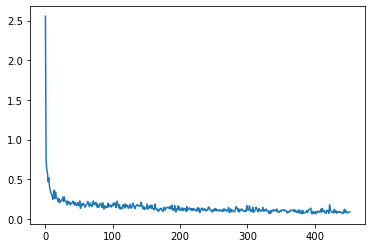

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)